In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from scipy.integrate import quad

In [2]:
# Fixed parameters
a = 0
b = 5

In [5]:
# Define the function f(x)
def f(x):
    return x**2  # Example function

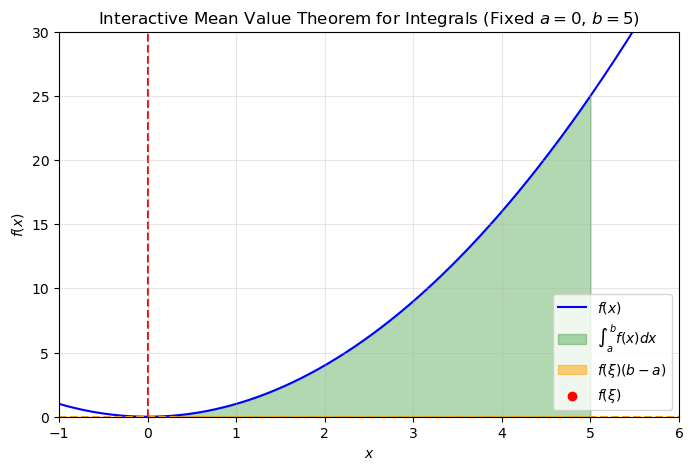

In [9]:
# Function to update the plot elements
def update(xi):
    global integral_fill, rectangle_fill, point, hline, vline
    # Compute the integral
    integral_value, _ = quad(f, a, b)
    
    # Rectangle area
    rectangle_area = f(xi) * (b - a)
    
    # Update the integral fill
    integral_fill.remove()
    integral_fill = ax.fill_between(x_fill, f(x_fill), color="green", alpha=0.3, zorder=0)
    
    # Update the rectangle
    rectangle_fill.remove()
    rectangle_fill = ax.fill_between([a, b], [f(xi), f(xi)], color="orange", alpha=0.5, zorder=2)
    
    # Update the point
    point.set_offsets([[xi, f(xi)]])
    
    # Update dashed lines
    hline.set_ydata(f(xi))
    vline.set_xdata(xi)

    # Print the values
    print(f"Integral value (area under curve): {integral_value:.4f}")
    print(f"Rectangle area (f(xi)*(b-a)): {rectangle_area:.4f}")

    # Redraw the figure
    fig.canvas.draw_idle()
    

In [11]:
# Generate x values for plotting
x = np.linspace(a - 1, b + 1, 500)

# Create the figure and axes only once
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the base elements once
line, = ax.plot(x, f(x), label=r"$f(x)$", color="blue", zorder=1)
x_fill = np.linspace(a, b, 500)
y_fill = f(x_fill)
integral_fill = ax.fill_between(x_fill, y_fill, color="green", alpha=0.3, label=r"$\int_a^b f(x) dx$", zorder=0)
rectangle_fill = ax.fill_between([a, b], [0, 0], color="orange", alpha=0.5, label=r"$f(\xi)(b-a)$", zorder=2)
point = ax.scatter([], [], color="red", zorder=3, label=r"$f(\xi)$")
hline = ax.axhline(0, color="orange", linestyle="--", zorder=1)
vline = ax.axvline(0, color="red", linestyle="--", zorder=1)

# Configure the axes
ax.set_xlim([a - 1, b + 1])
ax.set_ylim([0, f(b) + 5])
ax.set_title(r"Interactive Mean Value Theorem for Integrals (Fixed $a=0$, $b=5$)")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.legend()
ax.grid(alpha=0.3)

# Create the interactive slider
interactive(update, xi=(a, b, 0.1))

interactive(children=(FloatSlider(value=2.0, description='xi', max=5.0), Output()), _dom_classes=('widget-inte…